## Reference: Color - mapping, matplotlib and Pillow (PIL fork :~ )
[matplotlib colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) <br>
[matplotlib colorcet](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#colorcet) <br>
[matplotlib palettable](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#palettable) <br>

****
[StackOverflow colormapping](https://stackoverflow.com/questions/10965417/how-to-convert-numpy-array-to-pil-image-applying-matplotlib-colormap) <br>
[StackOverflow colormapping](https://stackoverflow.com/questions/43457308/is-there-any-good-color-map-to-convert-gray-scale-image-to-colorful-ones-using-p) <br>
<br>Color Space conversions MIT License<br>
[colorspacious docs](https://colorspacious.readthedocs.io/en/latest/) <br>
[colorspacious pypi](https://pypi.org/project/colorspacious/) <br>
****
### Web Reference:
[colorcet - percepually accurate maps](https://colorcet.pyviz.org/) <br>
[palettes - collected by type](https://jiffyclub.github.io/palettable/#matplotlib-discrete-colormap) <br>
[Seven Grayscale Algorithms (so-so)](http://www.tannerhelland.com/3643/grayscale-image-algorithm-vb6/) <br>

****
### Papers:
Note on Scale: ET equation graphics convey _BOTH_ quantity (metric) & form (surface) information. <br>
[Color Sequences for Univariate Maps: Theory, Experiments, and Principles, Ware](http://ccom.unh.edu/sites/default/files/publications/Ware_1988_CGA_Color_sequences_univariate_maps.pdf) <br>
<br> Color Spaces (Heatmap) <br>
[Diverging Color Maps for Scientific Visualization, Moreland](http://www.kennethmoreland.com/color-maps/ColorMapsExpanded.pdf) <br>
<br>Specific requirements for linear, diverging, rainbow & cyclic colour maps developed in detail<br>
[Good Color Maps: How to Design Them, Kovesi, 2015](https://arxiv.org/abs/1509.03700) <br>
****
[Classes of Color Maps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) <>

In [13]:
import os
from collections import OrderedDict

import numpy as np
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from colorspacious import cspace_converter

from PIL import Image

"""                          Classes of Color Maps == Categories            """
cmaps = {}
cmaps['Perceptually Uniform Sequential'] = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
                           'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
                           'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
                      'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
                          'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
                          'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

## Really big show: 
### *(from matplotlib main page above)*

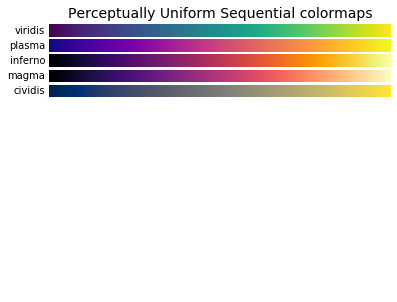

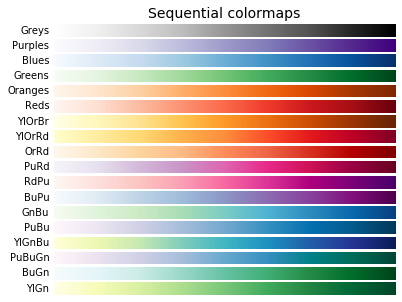

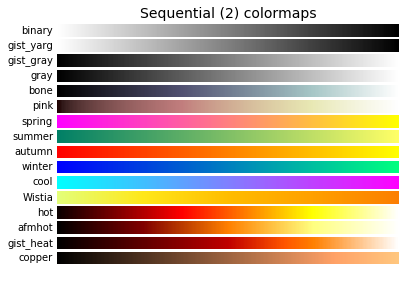

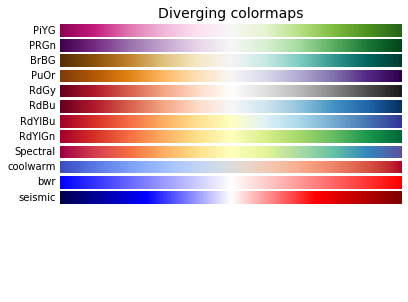

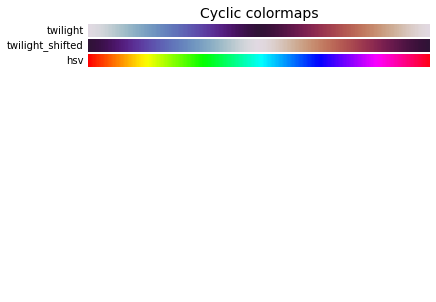

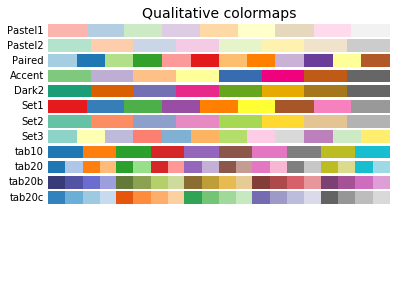

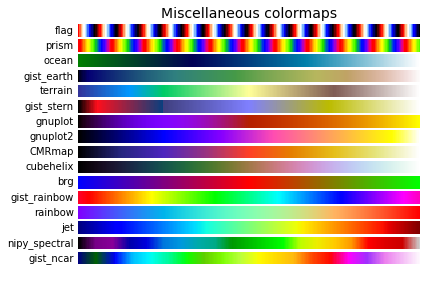

In [18]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

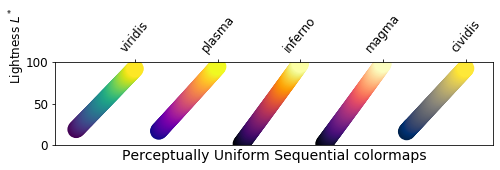

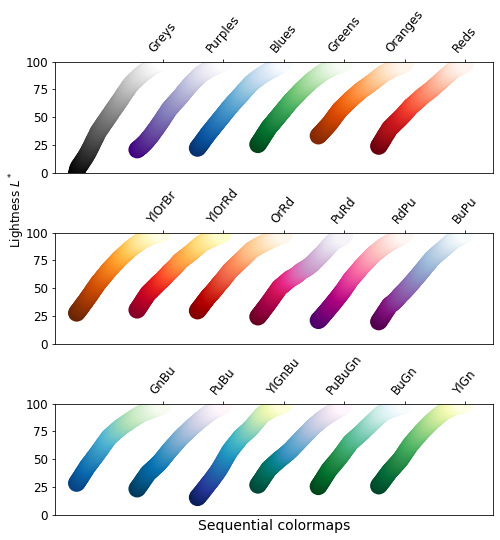

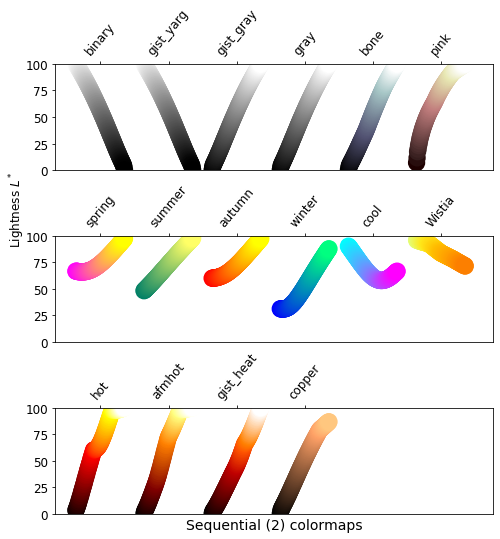

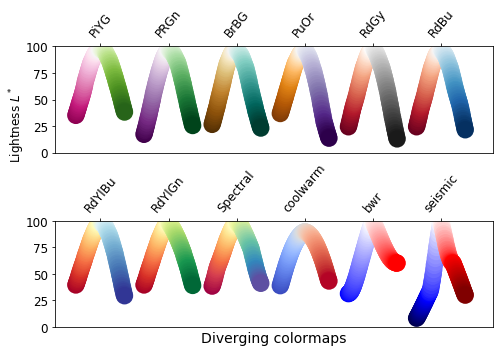

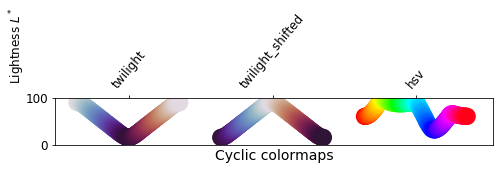

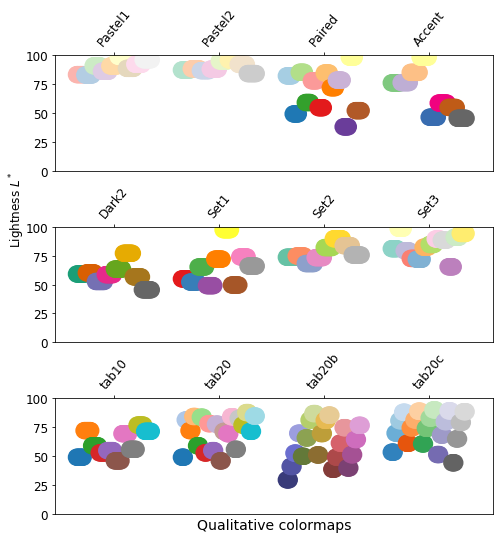

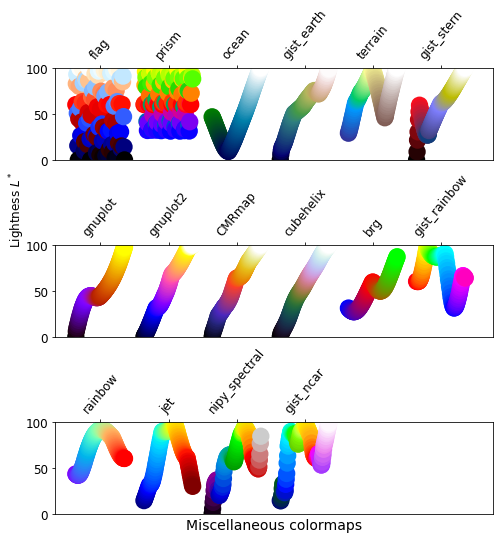

In [19]:
mpl.rcParams.update({'font.size': 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'Perceptually Uniform Sequential': 5, 'Sequential': 6,
          'Sequential (2)': 6, 'Diverging': 6, 'Cyclic': 3,
          'Qualitative': 4, 'Miscellaneous': 6}

# Spacing between the colormaps of a subplot
_DC = {'Perceptually Uniform Sequential': 1.4, 'Sequential': 0.7,
       'Sequential (2)': 1.4, 'Diverging': 1.4, 'Cyclic': 1.4,
       'Qualitative': 1.4, 'Miscellaneous': 1.4}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():

    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axes = plt.subplots(nrows=nsubplots, squeeze=False,
                             figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axes.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = cm.get_cmap(cmap)(x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # http://stackoverflow.com/questions/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axes[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)
    fig.text(0.0, 0.55, 'Lightness $L^*$', fontsize=12,
             transform=fig.transFigure, rotation=90)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()

## Grayscale conversion:

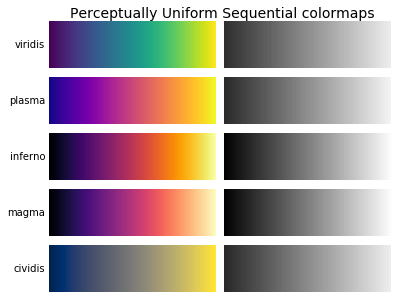

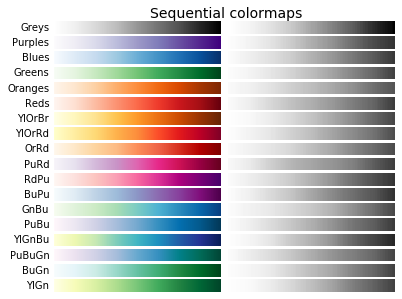

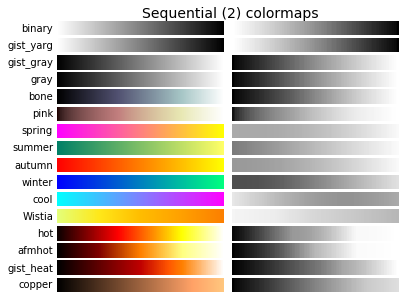

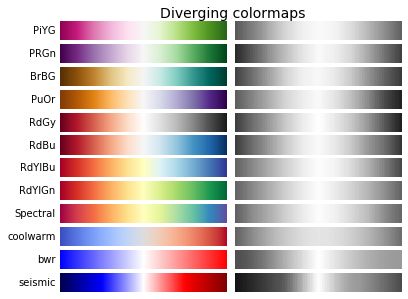

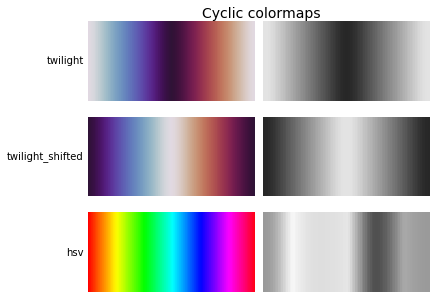

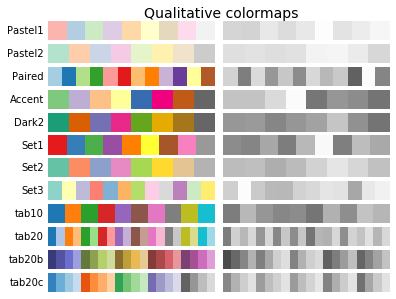

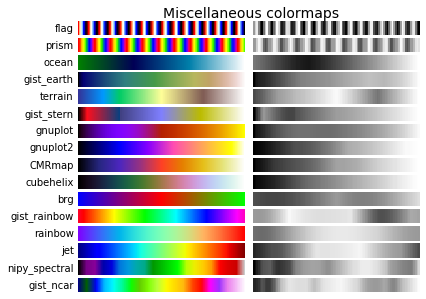

In [20]:
mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axes, cmap_list):

        # Get RGB values for colormap.
        rgb = cm.get_cmap(plt.get_cmap(name))(x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes.flat:
        ax.set_axis_off()

    plt.show()


for cmap_category, cmap_list in cmaps.items():

    plot_color_gradients(cmap_category, cmap_list)

Note that the example below demonstrated PIL as much faster than a matplotlib conversion method.<br>
[StackOverflow modified - rgb to grayscale](https://stackoverflow.com/questions/43457308/is-there-any-good-color-map-to-convert-gray-scale-image-to-colorful-ones-using-p) <br>

In [ ]:
def pil_test(imfile_name):
    cm_hot = mpl.cm.get_cmap('hot')
    """                                           Open the image as an array """
    img_src = Image.open(imfile_name).convert('L')
    img_src.thumbnail((512,512))
    im = np.array(img_src)
    im = cm_hot(im)
    im = np.uint8(im * 255)
    im = Image.fromarray(im)
    return im

imfile_name = tiff_list[0]
im = pil_test(imfile_name)
display(im)

## create color-map from rgb dict
[matplotlib colormap-manipulation ](https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html) <br>

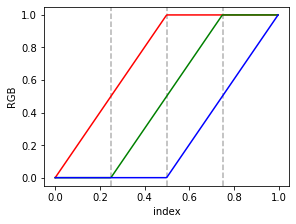

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 0.0, 0.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]]}

# see verdis below
cadct = {'red':   [[0.0,  0.0, 0.0],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 0.0, 0.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]],
         'alhpa': [1.0]}


def plot_linearmap(cdict):
    newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(cdict)


In [9]:
viridis = cm.get_cmap('viridis', 12)
print(viridis)

print('viridis.colors', viridis.colors)
print('viridis(range(12))', viridis(range(12)))
print('viridis(np.linspace(0, 1, 12))', viridis(np.linspace(0, 1, 12)))

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(range(12)) [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(np.linspace(0, 1, 12

In [26]:
import os
im_dir = '../../data/etg/nlC4Nr/'
im_file = 'nlC4Nr.22.30.46_8.14.2008.tif'
im_file_name = os.path.join(im_dir, im_file)
os.listdir(im_dir)

['nlC4Nr.22.30.46_8.14.2008.tif',
 'nlC4Nr.18.10.37_8.14.2008.tif',
 'nlC4Nr.20.27.40_8.14.2008.tif',
 'nlC4Nr.17.34.47_8.14.2008.tif',
 'nlC4Nr.19.53.18_8.14.2008.tif',
 'nlC4Nr.18.46.6_8.14.2008.tif',
 'nlC4Nr.22.18.17_8.14.2008.tif',
 'nlC4Nr.22.33.44_8.14.2008.tif',
 'nlC4Nr.17.39.28_8.14.2008.tif',
 'nlC4Nr.19.21.30_8.14.2008.tif',
 'nlC4Nr.17.52.26_8.14.2008.tif',
 'nlC4Nr.20.41.21_8.14.2008.tif',
 'nlC4Nr.23.5.56_8.14.2008.tif',
 'nlC4Nr.18.50.54_8.14.2008.tif',
 'nlC4Nr.19.44.24_8.14.2008.tif',
 'nlC4Nr.23.23.44_8.14.2008.tif',
 'nlC4Nr.21.44.11_8.14.2008.tif',
 'nlC4Nr.22.57.10_8.14.2008.tif',
 'nlC4Nr.20.51.6_8.14.2008.tif',
 'nlC4Nr.19.48.46_8.14.2008.tif',
 'nlC4Nr.20.8.13_8.14.2008.tif',
 'nlC4Nr.17.27.56_8.14.2008.tif',
 'nlC4Nr.23.1.45_8.14.2008.tif',
 'nlC4Nr.19.46.16_8.14.2008.tif',
 'nlC4Nr.22.37.44_8.14.2008.tif',
 'nlC4Nr.20.32.10_8.14.2008.tif',
 'nlC4Nr.18.58.6_8.14.2008.tif',
 'nlC4Nr.19.35.33_8.14.2008.tif',
 'nlC4Nr.21.34.25_8.14.2008.tif',
 'nlC4Nr.21.48.29_8.

In [28]:
from PIL import TiffImagePlugin as tip
im_file = 'nlC4Nr.22.30.46_8.14.2008.tif'
im_file_name = os.path.join(im_dir, im_file)
I = tip.Image.open(im_file_name)
A = np.asarray(tip.Image.open(im_file_name)) # .astype(np.uint8)

type(A), A.shape, type(A[0,0,0]), A[0,0,0]

(numpy.ndarray, (1200, 1920, 3), numpy.uint8, 128)

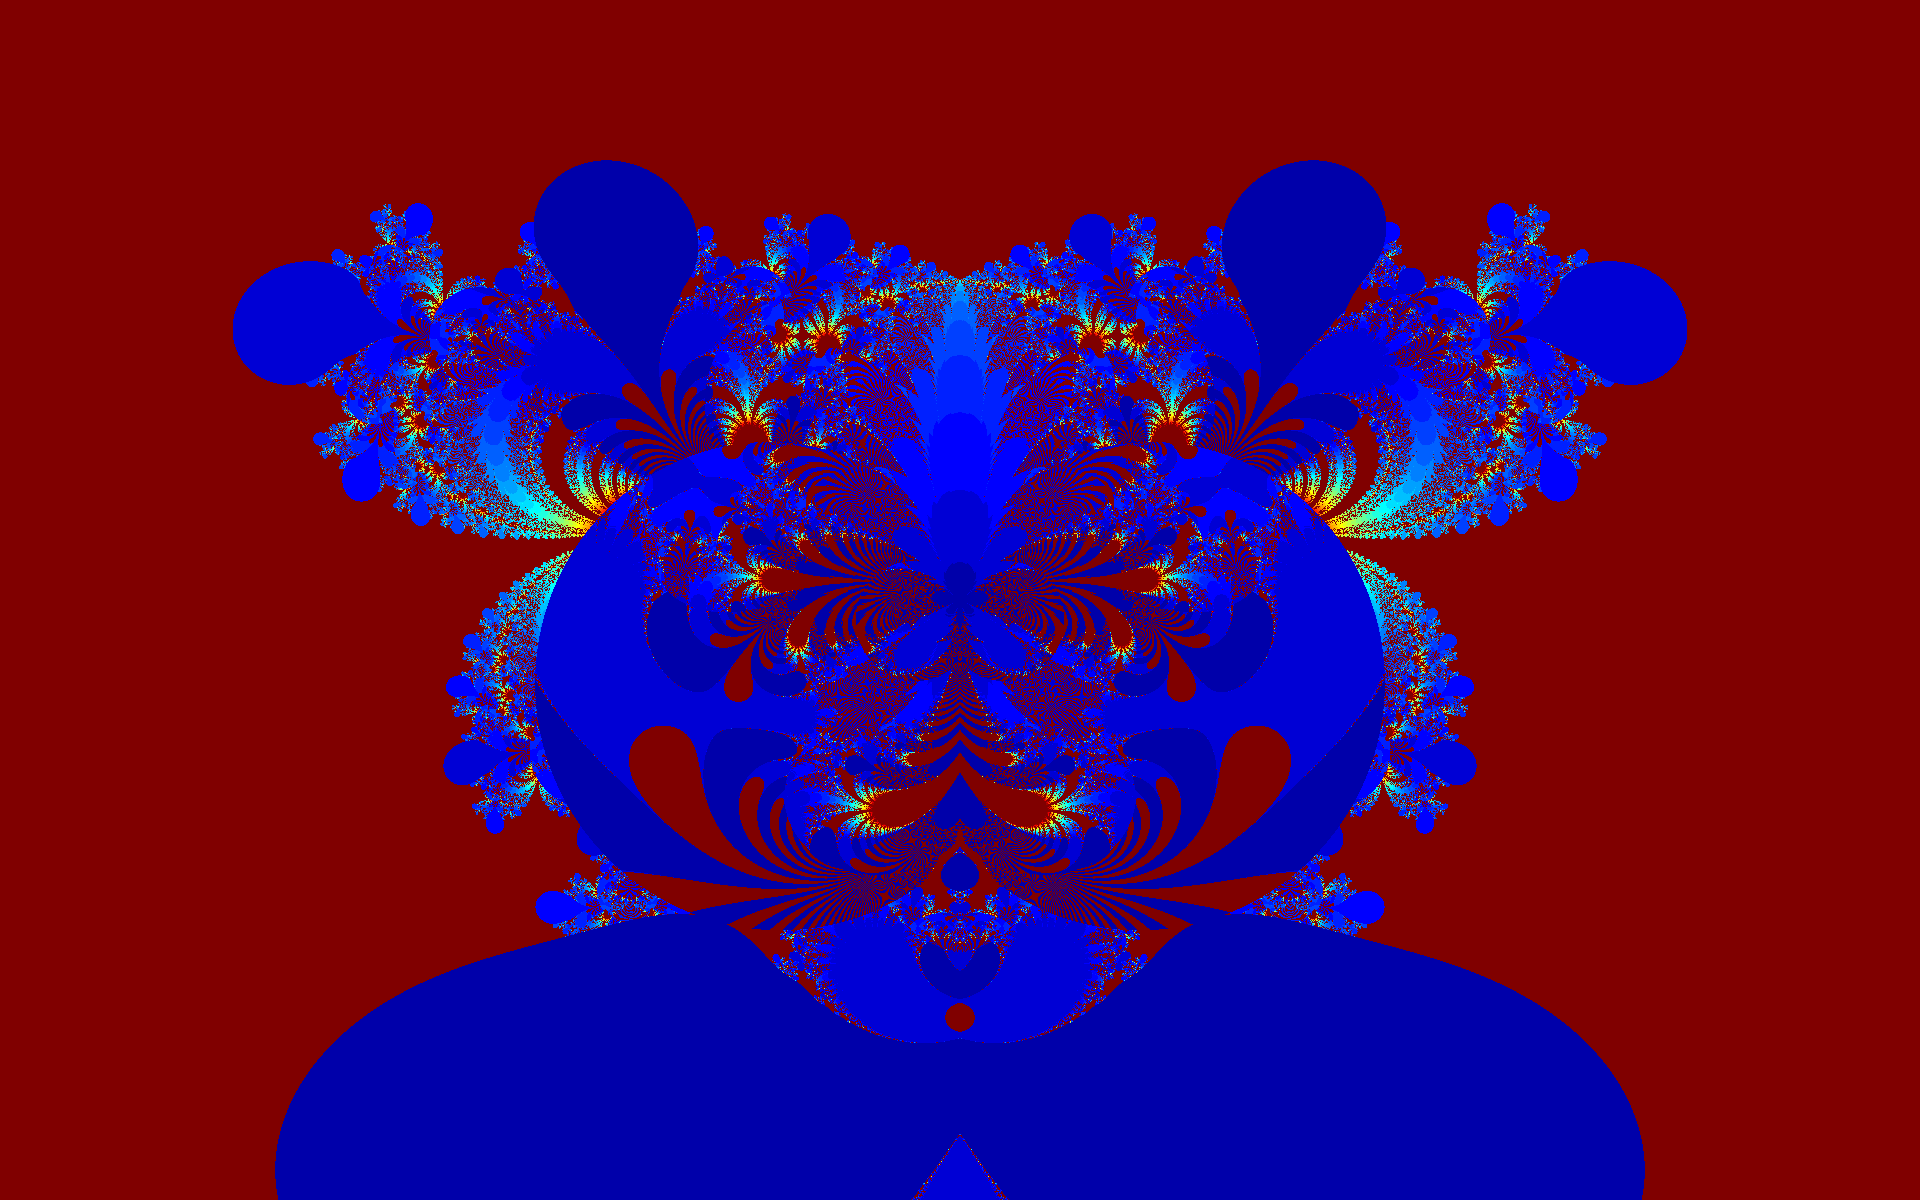

In [29]:
display(I)

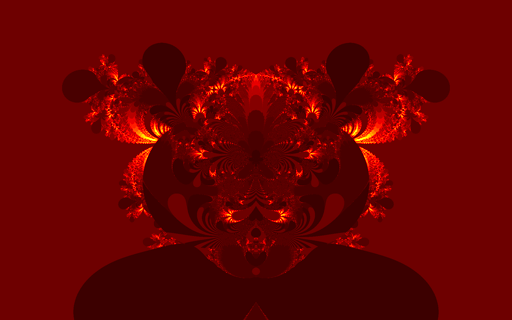

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image

def pil_test(imfile_name):
    cm_hot = mpl.cm.get_cmap('hot')
    """                                           Open the image as an array """
    img_src = Image.open(imfile_name).convert('L')
    img_src.thumbnail((512,512))
    im = np.array(img_src)
    im = cm_hot(im)
    im = np.uint8(im * 255)
    im = Image.fromarray(im)
    return im


im = pil_test(im_file_name)
display(im)